In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [68]:
data = pd.read_csv('out/study2.csv')
print("n rows: ", data.shape[0])
data.head(8)

n rows:  480


,metric,mean,method,i,dataset
0,CCC,0.317186,FS0_HT0,0,simulated
1,MAE,0.734932,FS0_HT0,0,simulated
2,R2,0.052835,FS0_HT0,0,simulated
3,RMSE,0.881830,FS0_HT0,0,simulated
4,RMSPE,234.118704,FS0_HT0,0,simulated
5,RSR,0.960121,FS0_HT0,0,simulated
6,r,0.406052,FS0_HT0,0,simulated
7,r2,0.232593,FS0_HT0,0,simulated


In [73]:
# split FS0_HT0 into FS0 and HT0
data['FS'] = data['method'].apply(lambda x: x.split('_')[0][2])
data['HT'] = data['method'].apply(lambda x: x.split('_')[1][2])
data

,metric,mean,method,i,dataset,FS,HT
0,CCC,0.317186,FS0_HT0,0,simulated,0,0
1,MAE,0.734932,FS0_HT0,0,simulated,0,0
2,R2,0.052835,FS0_HT0,0,simulated,0,0
3,RMSE,0.881830,FS0_HT0,0,simulated,0,0
4,RMSPE,234.118704,FS0_HT0,0,simulated,0,0
...,...,...,...,...,...,...,...
475,RMSE,1.144971,FS1_HT1,7,simulated,1,1
476,RMSPE,14.047619,FS1_HT1,7,simulated,1,1
477,RSR,1.157755,FS1_HT1,7,simulated,1,1
478,r,-0.110529,FS1_HT1,7,simulated,1,1


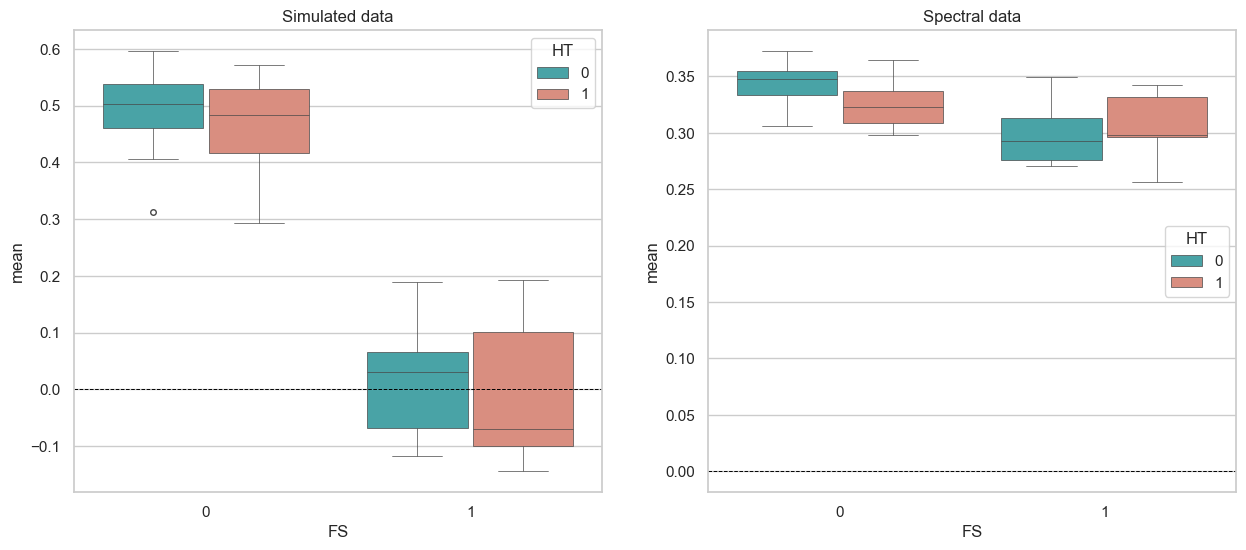

In [78]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#E88471"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, m in enumerate(["simulated", "spectral"]):
    sns.boxplot(
        data=data.query(f"dataset == '{m}' and metric == 'r'"),
        x="FS", y="mean",
        hue="HT",
        gap=0.05,
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[i],
    )
    axes[i].axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    axes[i].set_title(f"{m.capitalize()} data")